In [204]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [205]:
# soil = data provided already as csv
# export = export from .dbf file with coordinates with QGIS
soil_2009 = pd.read_csv('2009-soil.csv', delimiter='|')
soil_2015 = pd.read_csv('2015-soil.csv', delimiter=',')
soil_2015_export = pd.read_csv('2015-export.csv', delimiter=',')
soil_2018 = pd.read_csv('2018-soil.csv', delimiter=',')

In [206]:
soil_2009['SURV_DATE'] = soil_2009['SURV_DATE'].apply(lambda x: datetime.strptime(x, '%d%b%Y:%H:%M:%S').strftime('%d/%m/%y') if isinstance(x, str) else x)
soil_2009.head()
#df_2009.describe()
# Contains all relevant columns

,POINT_ID,sample_ID,X_LAEA,Y_LAEA,coarse,clay,silt,sand,pH_in_H2O,pH_in_CaCl,OC,CaCO3,N,P_x,K,CEC,Notes,GPS_LAT,GPS_LONG,X,Country,PTotal,Corine_LU,coords_x1,coords_x2,SURV_DATE,LC1,LC-parent,LC-Group,LC2,OBS_RADIUS,LU1,LU2,LC1_SPECIE,LC1_PERCEN,LC2_SPECIE,LC2_PERCEN,AREA_SIZE,TREES_HEIG,FEATURES_W,LAND_MNGT,WM_WATER_M,WM_SRC_IRR,WM_TYP_IRR,WM_DELIVER,SOIL_SURVE,SOIL_PLOUG,SOIL_CROP,SOIL_STONE,STRATA,STRATA2,nuts3,nuts0,area0,nuts1,area1,nuts2,area2,area3,Transect,CLIMANR,MAIN_CLIMA,LC,lc_GROUP,WRB_COD,AnnualPrec,WRB_LV1,ParMat1,ParMat2,Elevation(m),slope (Degrees),LONG,LAT,geom_X,geom_Y
0,26521974,17844,2652000.0,1974000.0,8,10,14,76,4.84,3.75,76.5,0.0,3.2,13.2,80.1,6.7,NaN,38.92962,9.36144,14767,Portugal,126.21,29,2652000.0,1974000.0,09/07/09,D10,D1,D,8,2.0,U400,8,NaN,5,NaN,0,3.0,2,2,2.0,8,0,0,0,1,2,4.0,1,4,0,PT171,PT,91957,PT1,88840,PT17,2852,1350,D10;21;C10;D10;21;D10;24;61;2;61;2;B82;D10;X,5.3,5,D,D1,CM,728.000001,Cambisol,consolidated-clastic-sedimentary rocks,psammite or arenite,150,3.433630,-9.36144,38.92962,2.652001e+06,1.973999e+06
1,26561964,17845,2656000.0,1964000.0,28,41,48,11,7.31,6.81,25.3,7.0,2.2,12.8,159.8,65.3,NaN,38.85139,9.29050,14768,Portugal,367.16,12,2656000.0,1964000.0,08/07/09,B16,B1,B,8,1.0,U111,8,NaN,2,NaN,0,3.0,0,0,2.0,1,2,2,8,1,1,4.0,1,1,0,PT171,PT,91957,PT1,88840,PT17,2852,1350,B16;F00;1;31;1;F00;B16,5.3,5,B,B1,CM,728.000001,Cambisol,consolidated-clastic-sedimentary rocks,psammite or arenite,154,7.735191,-9.29050,38.85139,2.656000e+06,1.964001e+06
2,26581768,17641,2658000.0,1768000.0,14,25,29,46,7.40,6.96,56.9,56.0,5.2,119.8,884.0,25.4,NaN,37.13911,8.77525,14572,Portugal,1419.24,20,2658000.0,1768000.0,07/06/09,E30,E3,E,8,2.0,U400,8,NaN,5,NaN,0,3.0,0,0,2.0,8,0,0,0,1,2,3.0,3,1,0,PT150,PT,91957,PT1,88840,PT15,4994,4994,E30;D10;61;A;1,5.7,5,E,E3,LV,446.290002,Luvisol,sedimentary rocks (chemically precipitated/eva...,calcareous rocks,56,0.000000,-8.77525,37.13911,2.658000e+06,1.768001e+06
3,26581792,17643,2658000.0,1792000.0,18,26,49,25,6.09,5.43,19.7,2.0,2.0,0.0,118.9,6.7,NaN,37.34975,8.83372,14574,Portugal,245.45,28,2658000.0,1792000.0,17/06/09,D20,D2,D,8,2.0,U400,8,NaN,5,NaN,0,3.0,0,0,2.0,8,0,0,0,1,2,2.0,4,4,0,PT150,PT,91957,PT1,88840,PT15,4994,4994,D20;PI(;D10;61;)PI;D10;E30;D20;61,5.3,5,D,D2,PZ,473.660000,Podzol,metamorphic rocks,acid regional metamorphic rocks,16,9.648046,-8.83372,37.34975,2.658001e+06,1.792000e+06
4,26581954,17846,2658000.0,1954000.0,11,34,37,29,8.21,7.52,14.5,128.0,1.4,22.5,227.0,26.9,NaN,38.76854,9.24210,14769,Portugal,349.92,21,2658000.0,1954000.0,07/07/09,B41,B4,B,8,1.0,U113,8,NaN,4,NaN,0,1.0,0,0,2.0,8,0,0,0,1,1,1.0,4,3,0,PT171,PT,91957,PT1,88840,PT17,2852,1350,B41;E30;11;62;11;E30;A,5.3,5,B,B4,VR,665.170002,Vertisol,igneous rocks,basic plutonic rocks,182,4.298638,-9.24210,38.76854,2.658000e+06,1.954001e+06


In [207]:
len(soil_2009['sample_ID']) == len(soil_2009['sample_ID'].drop_duplicates()) # Same => unique values

True

In [208]:
soil_2015.describe()
# Missing coordinates

,Point_ID,Coarse,Clay,Sand,Silt,pH(CaCl2),pH(H2O),EC,OC,CaCO3,P,N,K,Elevation,Soil_Stones
count,2.185900e+04,4258.000000,4260.000000,4260.000000,4260.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000
mean,4.287592e+07,21.633866,19.207981,37.418779,43.367136,5.745199,6.130833,26.091462,43.275982,57.268173,32.613839,3.104685,195.529677,386.294753,1.406835
std,8.177514e+06,14.804102,10.723485,19.170218,12.544561,1.398392,1.345302,33.339621,76.696684,135.300507,32.372183,3.672019,232.383766,388.514022,0.791719
min,2.658177e+07,0.000000,0.000000,2.000000,0.000000,2.600000,3.170000,0.310000,0.100000,0.000000,0.000000,0.000000,0.000000,-30.000000,1.000000
25%,3.538292e+07,11.000000,11.000000,22.000000,35.000000,4.500000,4.920000,10.295000,12.500000,0.000000,11.200000,1.300000,77.500000,108.000000,1.000000
50%,4.438403e+07,19.000000,18.000000,34.000000,45.000000,5.800000,6.070000,17.240000,20.400000,1.000000,23.800000,2.000000,143.100000,235.000000,1.000000
75%,4.960328e+07,30.000000,26.000000,50.000000,53.000000,7.100000,7.450000,28.400000,38.600000,19.000000,43.700000,3.300000,245.600000,576.000000,2.000000
max,6.498167e+07,90.000000,62.000000,100.000000,72.000000,10.000000,10.370000,969.000000,560.200000,976.000000,1017.600000,38.500000,10030.900000,11890.000000,4.000000


In [209]:
soil_2015_export.describe()
# Missing Elevation and Soil stones -> join X,Y

,X,Y,Point_ID,Coarse,Clay,Sand,Silt,pH_CaCl2,pH_H20,EC,OC,CaCO3,P,N,K
count,21859.000000,21859.000000,2.185900e+04,4258.000000,4260.000000,4260.000000,4260.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000,21859.000000
mean,10.305713,48.541830,4.287592e+07,21.633866,19.207981,37.418779,43.367136,5.745199,6.130833,26.091462,43.275982,57.268173,32.613839,3.104685,195.529677
std,10.913604,7.388405,8.177514e+06,14.804102,10.723485,19.170218,12.544561,1.398392,1.345302,33.339621,76.696684,135.300507,32.372183,3.672019,232.383766
min,-10.056282,34.690270,2.658177e+07,0.000000,0.000000,2.000000,0.000000,2.600000,3.170000,0.310000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,-0.348781,42.475690,3.538292e+07,11.000000,11.000000,22.000000,35.000000,4.500000,4.920000,10.295000,12.500000,0.000000,11.200000,1.300000,77.500000
50%,11.651814,47.453706,4.438403e+07,19.000000,18.000000,34.000000,45.000000,5.800000,6.070000,17.240000,20.400000,1.000000,23.800000,2.000000,143.100000
75%,19.923416,52.732333,4.960328e+07,30.000000,26.000000,50.000000,53.000000,7.100000,7.450000,28.400000,38.600000,19.000000,43.700000,3.300000,245.600000
max,34.029660,69.956515,6.498167e+07,90.000000,62.000000,100.000000,72.000000,10.000000,10.370000,969.000000,560.200000,976.000000,1017.600000,38.500000,10030.900000


In [210]:
soil_2015 = pd.merge(soil_2015,
                     soil_2015_export[['X', 'Y', 'Point_ID']],
                     on='Point_ID')
soil_2015.head()
# Missing survey date

,Point_ID,Revisited_point,Coarse,Clay,Sand,Silt,pH(CaCl2),pH(H2O),EC,OC,CaCO3,P,N,K,Elevation,LC1,LU1,Soil_Stones,NUTS_0,NUTS_1,NUTS_2,NUTS_3,LC1_Desc,LU1_Desc,X,Y
0,34103754,No,NaN,NaN,NaN,NaN,3.9,3.91,44.20,25.5,0,42.9,2.8,24.6,158,H11,U420,1,UK,UKM,UKM8,UKM81,Inland marshes,Semi-natural and natural areas not in use,-4.728037,56.045483
1,34443774,No,NaN,NaN,NaN,NaN,3.1,3.91,46.40,503.5,0,164.9,19.9,460.3,500,H12,U420,1,UK,UKM,UKM7,UKM77,Peatbogs,Semi-natural and natural areas not in use,-4.257593,56.282286
2,35163814,No,NaN,NaN,NaN,NaN,4.9,5.48,15.85,51.4,0,26.9,4.3,173.2,404,H11,U420,1,UK,UKM,UKM7,UKM71,Inland marshes,Semi-natural and natural areas not in use,-3.235859,56.757501
3,32323656,No,NaN,NaN,NaN,NaN,3.0,3.76,26.90,470.3,0,102.8,16.1,313.0,364,H12,U150,1,UK,UKN,UKN1,UKN10,Peatbogs,OTHER PRIMARY PRODUCTION,-7.129787,54.838146
4,34463934,No,28.0,10.0,46.0,44.0,3.9,4.04,28.40,43.1,1,6.3,2.3,38.6,315,D20,U111,2,UK,UKM,UKM6,UKM61,Shrubland without tree cover,Agriculture (excluding fallow land and kitchen...,-4.773786,57.689772


In [211]:
soil_2018.head()

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,OC (20-30 cm),CaCO3 (20-30 cm),Ox_Al,Ox_Fe,NUTS_0,NUTS_1,NUTS_2,NUTS_3,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,NaN,NaN,NaN,NaN,AT,AT1,AT11,AT113,47.150238,16.134212,06/07/18,291,C23,U120,Woodland,Other coniferous woodland,Forestry
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,NaN,NaN,NaN,NaN,AT,AT1,AT11,AT113,47.274272,16.175359,06/07/18,373,C21,U120,Woodland,Spruce dominated coniferous woodland,Forestry
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,NaN,NaN,NaN,NaN,AT,AT1,AT11,AT113,47.123260,16.289693,02/06/18,246,C33,U120,Woodland,Other mixed woodland,Forestry
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,NaN,NaN,NaN,NaN,AT,AT1,AT11,AT113,47.245693,16.357506,06/07/18,305,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,NaN,NaN,NaN,NaN,AT,AT1,AT11,AT113,47.296372,16.416782,05/07/18,335,C22,U120,Woodland,Pine dominated coniferous woodland,Forestry


['CEC' 'CaCO3' 'Clay' 'Coarse' 'Depth' 'EC' 'Elevation' 'K' 'LAT' 'LC1'
 'LONG' 'LU1' 'MAIN_CLIMA' 'N' 'NUTS_0' 'NUTS_1' 'NUTS_2' 'NUTS_3' 'OC'
 'P' 'POINT_ID' 'SURVEY_DATE' 'Sand' 'Silt' 'pH_CaCl2' 'pH_H2O'
 'slope (Degrees)']


<Axes: >

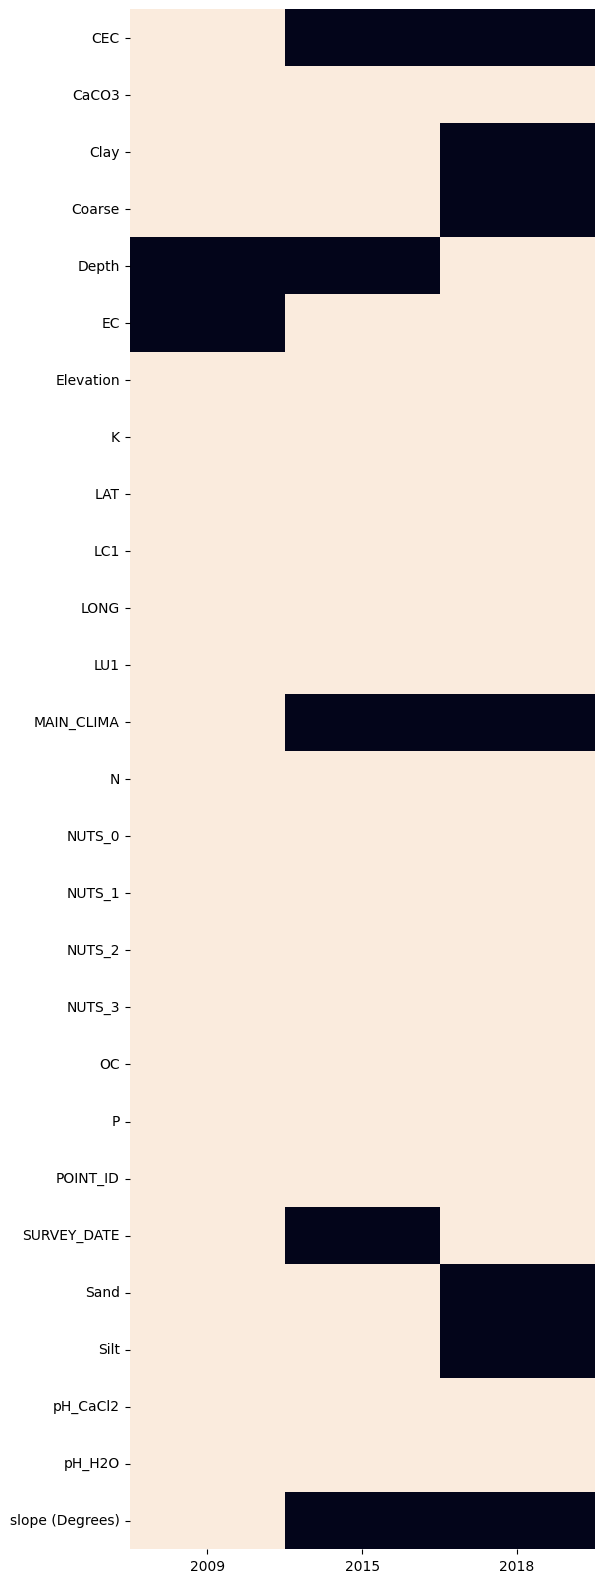

In [212]:
def in_cols(df, cols):
  row = {}
  for col in cols:
    row[col] = col in df.columns
  return row

soil_2009 = soil_2009.rename(columns={'Elevation(m)': 'Elevation', 'SURV_DATE': 'SURVEY_DATE', 'pH_in_CaCl': 'pH_CaCl2' ,'pH_in_H2O': 'pH_H2O',
                                      'sand': 'Sand', 'silt':'Silt', 'clay': 'Clay', 'coarse': 'Coarse', 'P_x':'P',
                                      'nuts0': 'NUTS_0', 'nuts1': 'NUTS_1', 'nuts2': 'NUTS_2', 'nuts3': 'NUTS_3'})
soil_2015 = soil_2015.rename(columns={'X': 'LONG', 'Y': 'LAT', 'Point_ID':'POINT_ID', 'pH(CaCl2)': 'pH_CaCl2', 'pH(H2O)': 'pH_H2O', 'Soil_Stones': 'SOIL_STONE'})
soil_2018 = soil_2018.rename(columns={'TH_LONG': 'LONG', 'TH_LAT': 'LAT', 'POINTID': 'POINT_ID', 'Elev':'Elevation', 'LC': 'LC1', 'LU': 'LU1'})

soil_2009 = soil_2009.drop(['TREES_HEIG',
                            'Transect',
                            'WM_DELIVER',
                            'WM_SRC_IRR',
                            'WM_TYP_IRR',
                            'WM_WATER_M',
                            'WRB_COD',
                            'WRB_LV1',
                            'X',
                            'X_LAEA',
                            'Y_LAEA',
                            'coords_x1',
                            'coords_x2',
                            'geom_X',
                            'geom_Y',
                            'PTotal',
                            'ParMat1',
                            'ParMat2',
                            'sample_ID',
                            'LC-Group',
                            'lc_GROUP',
                            'LC-parent',
                            'Notes',
                            'OBS_RADIUS',
                            'STRATA',
                            'STRATA2',
                            'LC',
                            'LU2',
                            'AREA_SIZE',
                            'AnnualPrec',
                            'Corine_LU',
                            'FEATURES_W',
                            'LAND_MNGT',
                            'area0',
                            'area1',
                            'area2',
                            'area3',
                            'CLIMANR',
                            'LC1_SPECIE',
                            'LC1_PERCEN',
                            'LC2',
                            'LC2_SPECIE',
                            'LC2_PERCEN',
                            'SOIL_SURVE',
                            'SOIL_PLOUG', # Signs of plowing: 1 – Yes, 2 – No, 8 – Not Relevant
                            'SOIL_CROP', # Percentage of residual crop: 1 – %RC < 10, 2 - 10 ≤ %RC < 25, 3 - 10 ≤ %RC < 25, 4 - %RC ≥ 50, 8 – Not Relevant
                            'SOIL_STONE', # Percentage of stones: 1 – %S < 10, 2 - 10 ≤ %S < 25, 3 - 10 ≤ %S < 25, 4 - %S ≥ 50, 8 – Not Relevant
                            'GPS_LAT', # => LAT
                            'GPS_LONG', # => LONG
                            'Country', # => NUTS_0
                            ],
                           axis=1, errors='ignore')

soil_2015 = soil_2015.drop(['Revisited_point',
                            'SOIL_STONE',
                            'LC0_Desc',
                            'LC1_Desc',
                            'LU1_Desc'],
                           axis=1, errors='ignore')

soil_2018 = soil_2018.drop(['LC0_Desc',
                            'LC1_Desc',
                            'LU1_Desc',
                            'Ox_Al',
                            'Ox_Fe',
                            'OC (20-30 cm)',
                            'CaCO3 (20-30 cm)'],
                           axis=1, errors='ignore')

# Check difference columns in df and clean up iteratation wise
soil_columns = np.concatenate((soil_2009.columns.values, soil_2015.columns.values, soil_2018.columns.values))
soil_columns = np.unique(soil_columns)
print(soil_columns)
col_summary_df = pd.DataFrame(columns=soil_columns)

col_summary_df.loc['2009'] = in_cols(soil_2009, soil_columns)
col_summary_df.loc['2015'] = in_cols(soil_2015, soil_columns)
col_summary_df.loc['2018'] = in_cols(soil_2018, soil_columns)

plt.figure(figsize=(6, 20))
sns.heatmap(col_summary_df.transpose(), cmap='rocket', cbar=False) # dark = column is missing

In [213]:
soil_2009.insert(1, 'SURVEY_YEAR', 2009)
soil_2015.insert(1, 'SURVEY_YEAR', 2015)
soil_2018.insert(1, 'SURVEY_YEAR', 2018)
soil = pd.concat([soil_2009, soil_2015, soil_2018])
soil.head()

,POINT_ID,SURVEY_YEAR,Coarse,Clay,Silt,Sand,pH_H2O,pH_CaCl2,OC,CaCO3,N,P,K,CEC,SURVEY_DATE,LC1,LU1,NUTS_3,NUTS_0,NUTS_1,NUTS_2,MAIN_CLIMA,Elevation,slope (Degrees),LONG,LAT,EC,Depth
0,26521974,2009,8.0,10.0,14.0,76.0,4.84,3.75,76.5,0.0,3.2,13.2,80.1,6.7,09/07/09,D10,U400,PT171,PT,PT1,PT17,5.0,150,3.433630,-9.36144,38.92962,NaN,NaN
1,26561964,2009,28.0,41.0,48.0,11.0,7.31,6.81,25.3,7.0,2.2,12.8,159.8,65.3,08/07/09,B16,U111,PT171,PT,PT1,PT17,5.0,154,7.735191,-9.29050,38.85139,NaN,NaN
2,26581768,2009,14.0,25.0,29.0,46.0,7.40,6.96,56.9,56.0,5.2,119.8,884.0,25.4,07/06/09,E30,U400,PT150,PT,PT1,PT15,5.0,56,0.000000,-8.77525,37.13911,NaN,NaN
3,26581792,2009,18.0,26.0,49.0,25.0,6.09,5.43,19.7,2.0,2.0,0.0,118.9,6.7,17/06/09,D20,U400,PT150,PT,PT1,PT15,5.0,16,9.648046,-8.83372,37.34975,NaN,NaN
4,26581954,2009,11.0,34.0,37.0,29.0,8.21,7.52,14.5,128.0,1.4,22.5,227.0,26.9,07/07/09,B41,U113,PT171,PT,PT1,PT17,5.0,182,4.298638,-9.24210,38.76854,NaN,NaN


In [214]:
# Add clima to missing LUCAS points based on same existing LUCAS points from 2009
clima_df = soil[(soil['SURVEY_YEAR']==2009)][['POINT_ID','MAIN_CLIMA']].set_index('POINT_ID')
soil = soil.drop('MAIN_CLIMA', axis=1).join(clima_df, on='POINT_ID')

In [215]:
from datetime import datetime
# Extract SURVEY_MONTH in new column
soil['SURVEY_MONTH'] = soil['SURVEY_DATE'].apply(lambda x: int(x.split('/')[1]) if isinstance(x, str) else x)

<Axes: >

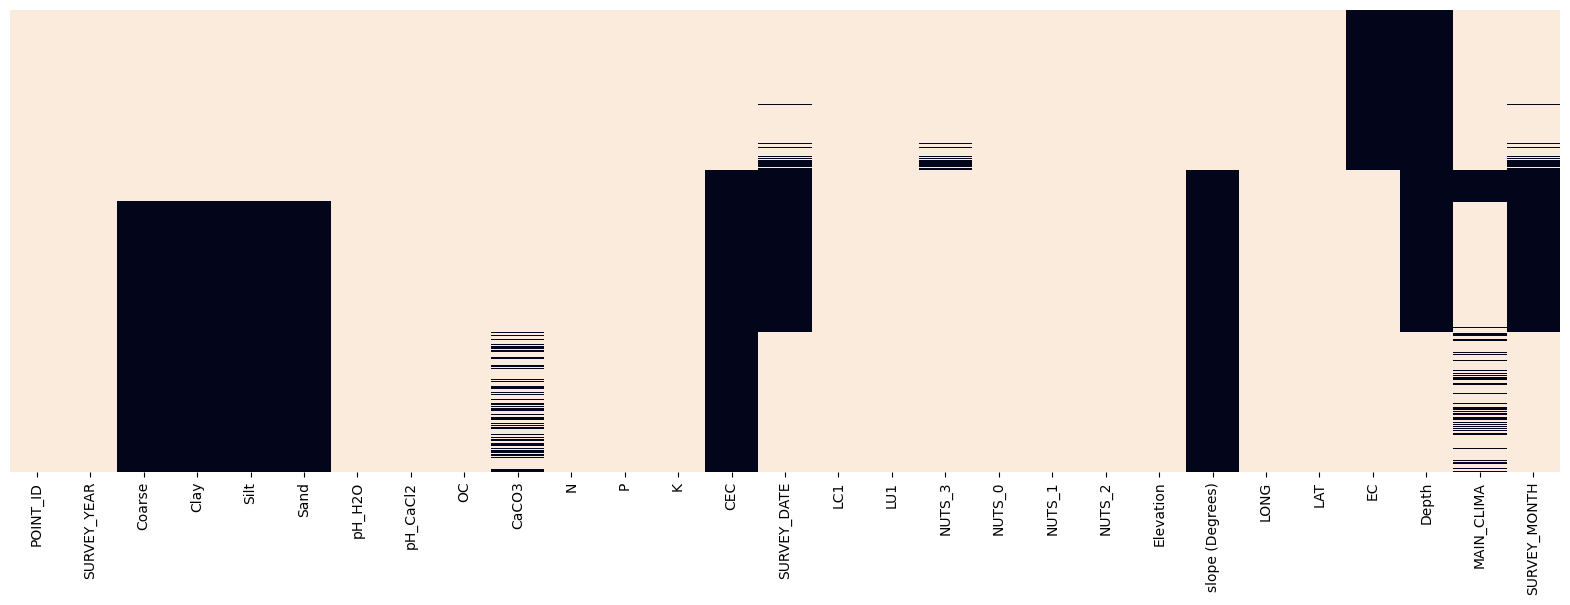

In [216]:
plt.figure(figsize=(20, 6))
sns.heatmap(soil.isnull(), yticklabels=False, cmap='rocket_r', cbar=False)

In [217]:
soil = soil.replace({'< LOD': np.NaN, '<  LOD': np.NaN, '<0.0': np.NaN})
soil.to_csv('soil-merged.csv', index=False)

In [218]:
# Check to import again
soil_in = pd.read_csv('soil-merged.csv')
soil_in.dtypes

<ipython-input-218-7544ddd9370f>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  soil_in = pd.read_csv('soil-merged.csv')


POINT_ID             int64
SURVEY_YEAR          int64
Coarse             float64
Clay               float64
Silt               float64
Sand               float64
pH_H2O             float64
pH_CaCl2           float64
OC                 float64
CaCO3              float64
N                  float64
P                  float64
K                  float64
CEC                float64
SURVEY_DATE         object
LC1                 object
LU1                 object
NUTS_3              object
NUTS_0              object
NUTS_1              object
NUTS_2              object
Elevation            int64
slope (Degrees)    float64
LONG               float64
LAT                float64
EC                 float64
Depth               object
MAIN_CLIMA         float64
SURVEY_MONTH       float64
dtype: object